PROJECT SUMMARY

Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.

Stock Market Performance Analysis: Overview

Stock market performance analysis can be used to inform investment decisions and help investors make informed decisions about buying or selling stocks. Suppose you work as a data science professional in a company that provides services based on investment decisions. As a data science professional, you can help your business by analyzing the historical performance of different companies, identifying potential opportunities and risks in the stock market, and adjusting your clients’ investment strategies accordingly.

As a data science professional, you can go through a structured process of stock market performance analysis, which involves collecting historical stock price data of different companies from trusted sources such as Yahoo Finance, visualizing data using various charts, calculating movements, averages and volatility for each company, and performing correlation analysis to analyze the relationships between different stock prices.

In [ ]:
import pandas as pd

Stock Market Performance Analysis using Python

Let’s start the task of Stock Market Performance Analysis by importing the necessary Python libraries and the dataset. For this task, I will use the Yahoo finance API (yfinance) to collect real-time stock market data for the past three months.

It’s important to collect real-time data for this task.

In [ ]:
!pip install yfinance

**Background on stock markets**

Stock markets play a pivotal role in the global economy. They represent a place where companies can raise capital by issuing shares to the public, and investors can buy or sell these shares. Understanding stock markets is essential for anyone interested in investment or finance.

**Objective and scope**

In this project, we aim to harness the power of Python to analyze stock market performance. By the end, you'll understand how stock prices move, identify trends, and even develop potential investment strategies.

**Data Collection Fetching stock data:**

To start any stock market analysis, we need data. Python offers several libraries to fetch this data seamlessly.

In [ ]:
!pip install yfinance pandas_datareader

In [ ]:
import yfinance as yf
stock = yf.Ticker("AAPL")  # Using Apple's stock symbol
data = stock.history(period="1y")  # Fetching data for 1 year

**Choosing stocks for analysis:**

For a comprehensive analysis, it's advisable to select stocks from various sectors. For instance, consider tech stocks (AAPL, MSFT), financials (JPM), and consumer goods (PEP). This diversification gives a broader view of the market.

**Data Preprocessing bold text**

Before diving into analysis, we need to ensure our data is clean and in the right format.

**Handling missing values:**

It's common to encounter missing values in stock data. We need to address these to avoid errors in our analysis.

In [ ]:
#Checking null values
data.isna().value_counts()

Open   High   Low    Close  Volume  Dividends  Stock Splits
False  False  False  False  False   False      False           252
dtype: int64

In [ ]:
data.dropna(inplace=True)  # This removes any rows with missing values

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-30 00:00:00-05:00,140.614017,147.893336,139.768751,147.207169,111380900,0.0,0.0
2022-12-01 00:00:00-05:00,147.386191,148.301076,145.795079,147.485626,71250400,0.0,0.0
2022-12-02 00:00:00-05:00,145.148696,147.177350,144.840406,146.988403,65447400,0.0,0.0
2022-12-05 00:00:00-05:00,146.948635,150.081120,144.959752,145.814972,68826400,0.0,0.0
2022-12-06 00:00:00-05:00,146.252527,146.481244,141.131144,142.115646,64727200,0.0,0.0


In [ ]:
data.index = pd.to_datetime(data.index) #Ensure date format is correct:

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-30 00:00:00-05:00,140.614017,147.893336,139.768751,147.207169,111380900,0.0,0.0
2022-12-01 00:00:00-05:00,147.386191,148.301076,145.795079,147.485626,71250400,0.0,0.0
2022-12-02 00:00:00-05:00,145.148696,147.177350,144.840406,146.988403,65447400,0.0,0.0
2022-12-05 00:00:00-05:00,146.948635,150.081120,144.959752,145.814972,68826400,0.0,0.0
2022-12-06 00:00:00-05:00,146.252527,146.481244,141.131144,142.115646,64727200,0.0,0.0


**Calculate daily returns:**

Daily returns provide insights into the stock's volatility. It's calculated as the percentage change in the stock's price from the previous day.

In [ ]:
data['Daily Return'] = data['Close'].pct_change() #calculating daily returns

In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return
Date,,,,,,,,
2022-11-30 00:00:00-05:00,140.614017,147.893336,139.768751,147.207169,111380900,0.0,0.0,NaN
2022-12-01 00:00:00-05:00,147.386191,148.301076,145.795079,147.485626,71250400,0.0,0.0,0.001892
2022-12-02 00:00:00-05:00,145.148696,147.177350,144.840406,146.988403,65447400,0.0,0.0,-0.003371
2022-12-05 00:00:00-05:00,146.948635,150.081120,144.959752,145.814972,68826400,0.0,0.0,-0.007983
2022-12-06 00:00:00-05:00,146.252527,146.481244,141.131144,142.115646,64727200,0.0,0.0,-0.025370


**Exploratory Data Analysis (EDA)**

EDA helps us understand the nature and structure of our data. It's the first step in identifying trends or anomalies.

**Visualize stock price movements:**

A simple line plot can show us how the stock's closing price has moved over time.

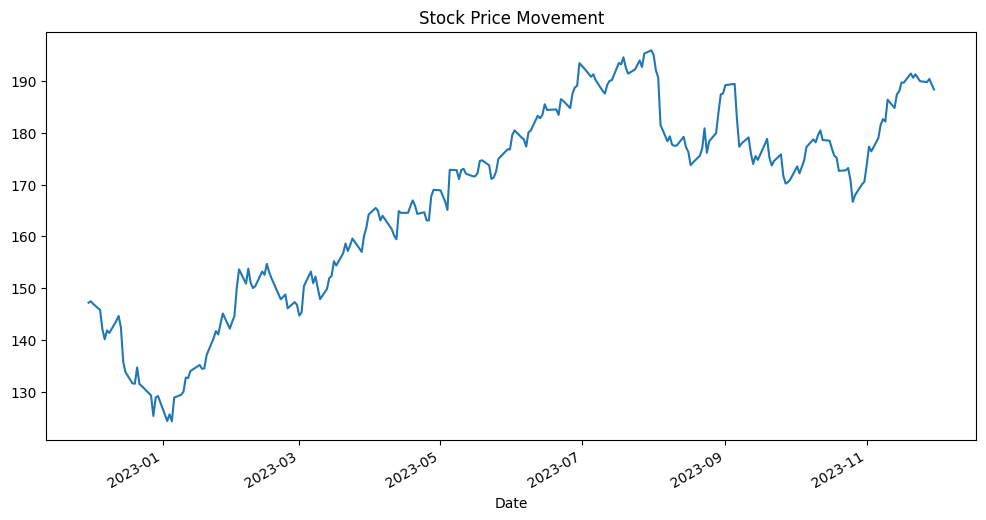

In [ ]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.show()

**Analyze volume of stocks traded:**

Volume indicates the number of shares traded in a given period. High volume can suggest significant news or events affecting the stock.

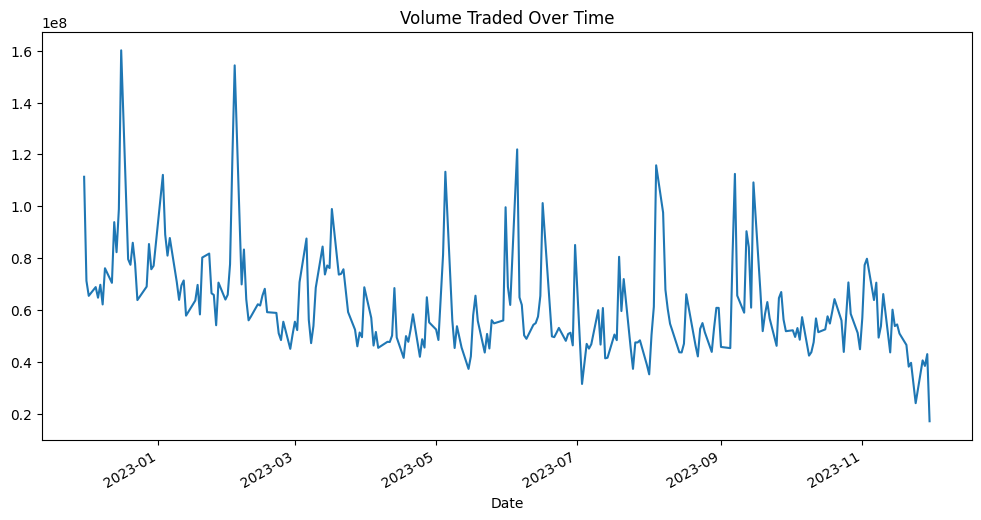

In [ ]:
data['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.show()

**Correlation between stocks:**

When analyzing multiple stocks, it's essential to see how they move in relation to one another. A heatmap can visualize this relationship.

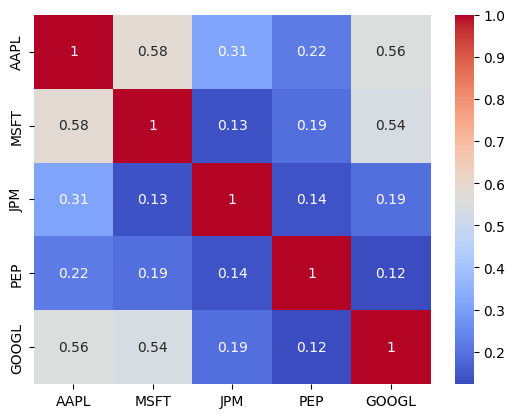

In [ ]:
import seaborn as sns

stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
   close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**Technical Analysis**

Technical analysis involves studying past market data, primarily price and volume, to forecast future price movements. This analysis can be performed on any security with historical trading data.

**Moving Averages:**

A moving average smoothens price data to create a single flowing line, which makes it easier to identify the direction of the trend. The two most common types of moving averages are the Simple Moving Average (SMA) and the Exponential Moving Average (EMA).

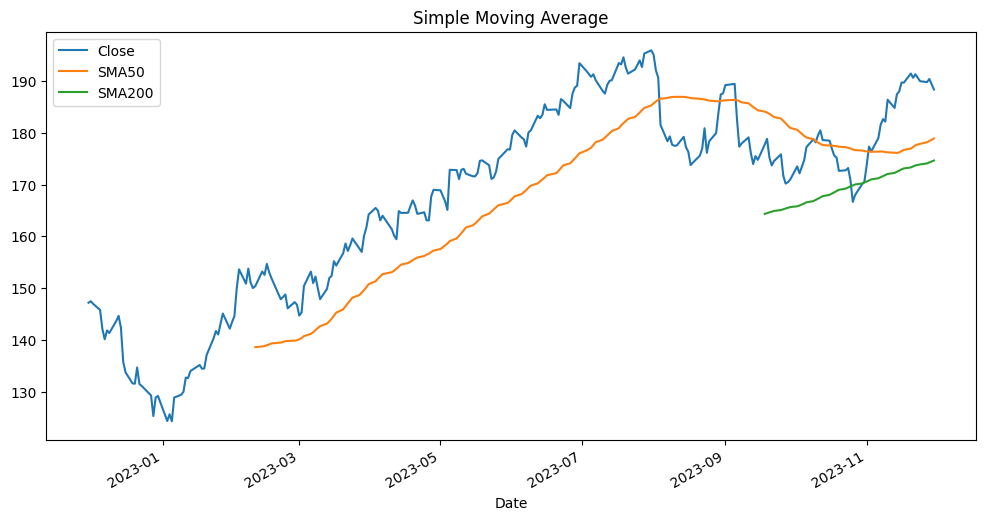

In [ ]:
#Simple Moving Average (SMA):
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

data[['Close', 'SMA50', 'SMA200']].plot(figsize=(12,6))
plt.title('Simple Moving Average')
plt.show()

Note: Here, SMA50 is the 50-day moving average, and SMA200 is the 200-day moving average. When SMA50 crosses above SMA200, it's often seen as a bullish sign, and vice versa.

**Exponential Moving Average (EMA):**

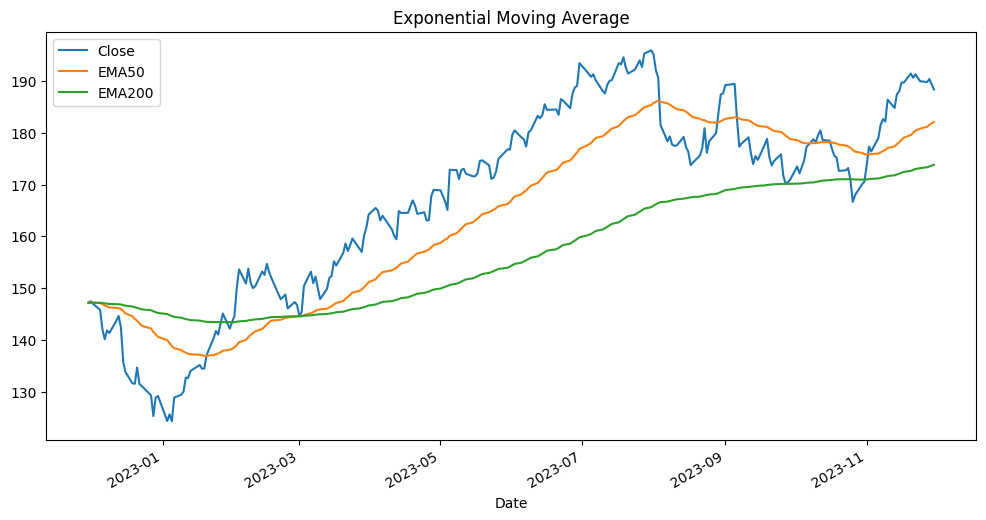

In [ ]:
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

data[['Close', 'EMA50', 'EMA200']].plot(figsize=(12,6))
plt.title('Exponential Moving Average')
plt.show()

EMA gives more weight to recent prices, and therefore reacts more quickly to price changes than SMA.

**Bollinger Bands:**

Bollinger Bands consist of a middle band being an N-period simple moving average (SMA), an upper band at K times an N-period standard deviation above the middle band, and a lower band at K times an N-period standard deviation below the middle band.

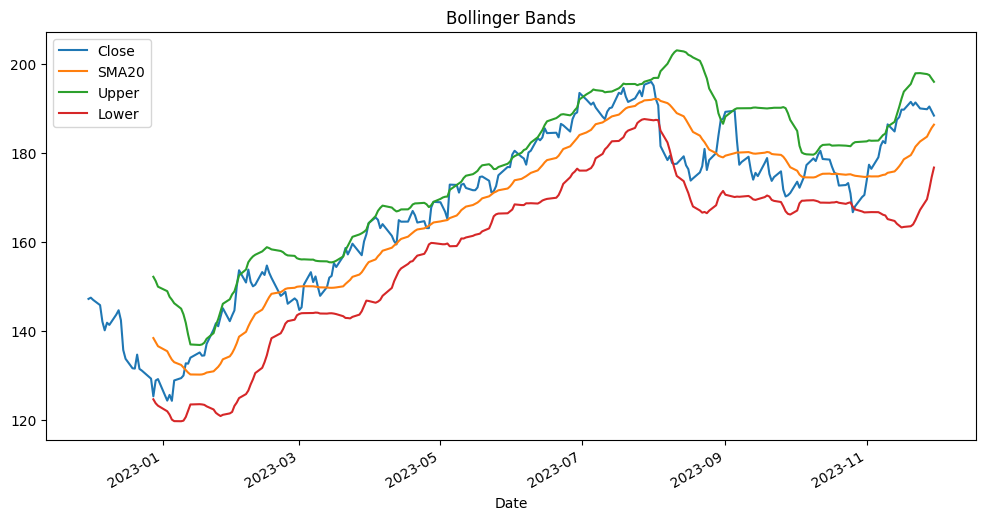

In [ ]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA20'] + 2*data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA20'] - 2*data['Close'].rolling(window=20).std()

data[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bollinger Bands')
plt.show()

Bollinger Bands are used to determine overbought and oversold levels; when the price reaches the upper band, it might be overbought, and when it reaches the lower band, it might be oversold.

**ARIMA Model:**

ARIMA stands for AutoRegressive Integrated Moving Average. It is a forecasting method for univariate time series data.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


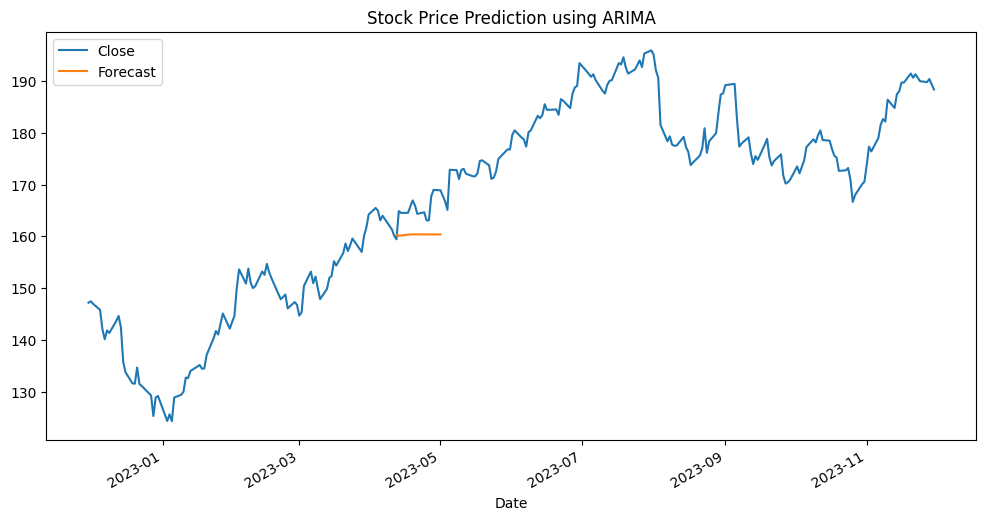

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order=(5, 1, 0))  # ARIMA(p, d, q) order
results = model.fit()

data['Forecast'] = results.predict(start=90, end=103, dynamic=True)


data[['Close', 'Forecast']].plot(figsize=(12,6))

plt.title('Stock Price Prediction using ARIMA')

plt.show()

Portfolio Optimization When dealing with multiple stocks, it's crucial to determine how much of each stock you should hold in your portfolio.

**Efficient Frontier:**

This is a concept from Modern Portfolio Theory. The efficient frontier represents the set of optimal portfolios that offer the highest expected return for a specific level of risk.

In [ ]:
import numpy as np

In [ ]:
from scipy.optimize import minimize

# Assuming stock_list contains the symbols of the stocks in the portfolio
returns = close_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178 # example value

# Portfolio optimization function
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
   returns = np.sum(mean_returns*weights ) *252
   std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
   return std, returns

# Minimize negative Sharpe Ratio to get optimal portfolio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
   p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
   return -(p_ret - risk_free_rate) / p_var

# Constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Running the optimization
initial = [1./len(stock_list) for stock in stock_list]
bounds = tuple((0, 1) for asset in range(len(stock_list)))
result = minimize(neg_sharpe_ratio, initial, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

Note: The above is a simple example of portfolio optimization. There are many other factors and constraints that can be considered.

**Conclusion**

Summarize the insights gathered from the analysis:

Stock price trends over the past year.

Technical indicators and their implications.

Potential investment strategies based on historical data.

Performance of the developed trading strategy.


**Challenges & Future Work**

Discuss the challenges encountered during the project:

Data inconsistencies or missing values.

Assumptions made during the analysis and their implications.

Limitations of the chosen models and strategies.


**Suggest avenues for future exploration:**

Incorporating more sophisticated models like neural networks for stock price prediction.

Exploring algorithmic trading strategies using tools like backtrader or QuantConnect.

Integrating real-time data feeds for live trading.